# Using an Autoencoder to reduce the dimentionality of the dataset can provide a way for the data to be plotted on a scatter plot - giving us a better idea of the distribution of the data

In [1]:
import tensorflow as tf
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
y = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/experimental_dataset_labels.csv', index_col=False)
X = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/scaled_experimental_dataset.csv', index_col=False)

In [4]:
X

,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,vin_sz,vout_sz,size,fee,time,sat_per_byte
0,0.001037,0.001037,0.001037,0.001037,0.002075,0.000000,0.000000,0.000511,0.000000,0.246966,0.000000
1,0.001037,0.001037,0.001037,0.001037,0.002075,0.000000,0.000000,0.001188,0.000000,0.325150,0.000000
2,0.000056,0.000056,0.000056,0.000056,0.000056,0.000000,0.000361,0.001543,0.000000,0.204946,0.000000
3,0.000000,0.001037,0.000519,0.000000,0.002075,0.000000,0.000000,0.000250,0.000000,0.157484,0.000000
4,0.000000,0.001037,0.000519,0.000000,0.002075,0.000000,0.000000,0.000250,0.000000,0.140746,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
11320,0.000482,0.000482,0.000482,0.000482,0.000482,0.000000,0.000361,0.001199,0.000103,0.980068,0.001142
11321,0.001349,0.001348,0.001349,0.000674,0.001348,0.001880,0.000361,0.003430,0.010309,0.992328,0.058542
11322,0.053782,0.050453,0.052117,0.053782,0.100906,0.000000,0.000361,0.001532,0.010309,0.992330,0.100000
11323,0.002075,0.002075,0.002075,0.002075,0.002075,0.000000,0.000361,0.001543,0.010309,0.992328,0.099612


In [5]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# Split into training, validation and test data
# Stratify to get even distribution of classes in the training and test data
# This is useful because we have an uneven class proprtion (far fewer fraudulent transactions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42, stratify=y)

# Create validation set as 15% of orginal dataset (not 10% of X_train which would be 10% of 80%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), stratify=y_test)

In [6]:
X_test.shape

(1133, 11)

In [7]:
input_dim = 11
latent_dim = 3

encoder = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(11, )),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(latent_dim)
])

decoder = keras.models.Sequential([
  keras.layers.Dense(8, input_shape=(latent_dim, )),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(input_dim)
])

Autoencoder = keras.models.Sequential([encoder, decoder])

In [8]:
Autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 43279     
                                                                 
 sequential_1 (Sequential)   (None, 11)                43287     
                                                                 
Total params: 86566 (338.15 KB)
Trainable params: 86566 (338.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
Autoencoder.compile(loss='mse',
                    optimizer=keras.optimizers.SGD())

In [10]:
Autoencoder.fit(X_train, X_train, validation_data=[X_val, X_val], epochs=50)

Epoch 1/50
284/284 [==============================] - 3s 6ms/step - loss: 0.0258 - val_loss: 0.0090
Epoch 2/50
284/284 [==============================] - 3s 12ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 3/50
284/284 [==============================] - 3s 11ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 4/50
284/284 [==============================] - 2s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 9/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.00

In [12]:
# fit using encoder only
y_pred_new_dim = encoder.predict(X_test)

36/36 [==============================] - 0s 4ms/step


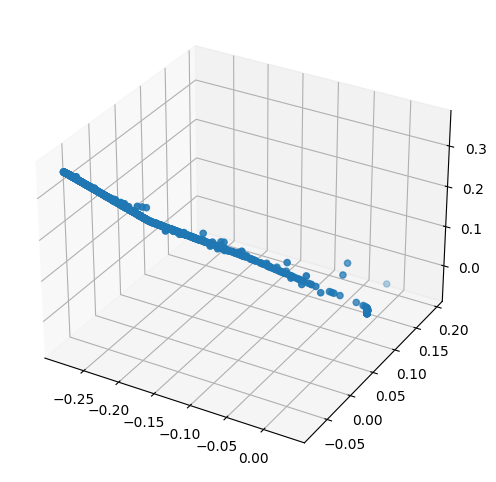

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

encoded_df = pd.DataFrame(y_pred_new_dim, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

encoded_df_scaled = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(encoded_df['Dimension 1'], encoded_df['Dimension 2'], encoded_df['Dimension 3'])

plt.show()

In [22]:
input_dim = 11
latent_dim = 2

encoder_v2 = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=(11, )),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(latent_dim)
])

decoder_v2 = keras.models.Sequential([
  keras.layers.Dense(8, input_shape=(latent_dim, )),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(input_dim)
])

Autoencoder_v2 = keras.models.Sequential([encoder_v2, decoder_v2])

In [23]:
Autoencoder_v2.compile(loss='mse',
                    optimizer=keras.optimizers.SGD())
Autoencoder_v2.fit(X_train, X_train, validation_data=[X_val, X_val], epochs=50)

Epoch 1/50
284/284 [==============================] - 3s 5ms/step - loss: 0.0231 - val_loss: 0.0067
Epoch 2/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 3/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 4/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/50
284/284 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/50
284/284 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/50
284/284 [==============================] - 1s 5ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
284/284 [==============================] - 2s 5ms/step - loss: 0.0026 - val_loss: 0.0024

In [24]:
# fit using encoder only
y_pred_2d = encoder_v2.predict(X_test)

36/36 [==============================] - 0s 2ms/step


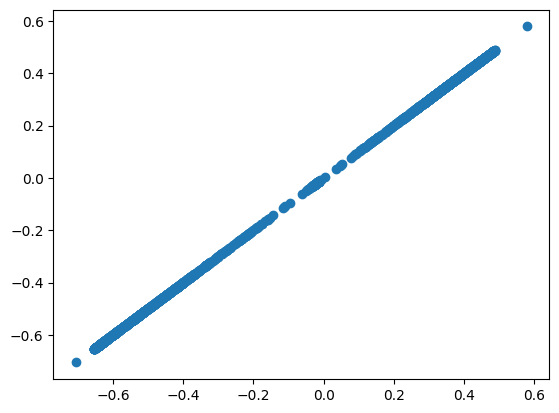

In [33]:
plt.scatter(y_pred_2d, y_pred_2d)
plt.show()